# Q1

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
df = pd.read_csv("diabetes_csv.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [42]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [43]:
#dropping rows with null values
#df.dropna(inplace = True)
#or filling null values with mean of the column
df.fillna(df.mean(), inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [45]:
df.shape

(768, 9)

In [46]:
#creating dummy variables for column pregnancies
bins = [-1, 0, 2, 5, 10, 17]
labels = ['No_Pregnancy', 'Low_Pregnancy', 'Moderate_Pregnancy', 'High_Pregnancy', 'Very_High_Pregnancy']
df['Pregnancy_Category'] = pd.cut(df['Pregnancies'], bins=bins, labels=labels)
dummy_df = pd.get_dummies(df['Pregnancy_Category'], prefix='Pregnancy')
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(['Pregnancies', 'Pregnancy_Category'], axis=1) #dropping original column
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancy_No_Pregnancy,Pregnancy_Low_Pregnancy,Pregnancy_Moderate_Pregnancy,Pregnancy_High_Pregnancy,Pregnancy_Very_High_Pregnancy
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,0,0,0,1,0
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,0,1,0,0,0
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,0,0,0,1,0
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,0,1,0,0,0
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,1,0,0,0,0


In [55]:
df1 = df.to_numpy()
df1

array([[148.        ,  72.        ,  35.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 85.        ,  66.        ,  29.        , ...,   0.        ,
          0.        ,   0.        ],
       [183.        ,  64.        ,  29.15341959, ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [121.        ,  72.        ,  23.        , ...,   1.        ,
          0.        ,   0.        ],
       [126.        ,  60.        ,  29.15341959, ...,   0.        ,
          0.        ,   0.        ],
       [ 93.        ,  70.        ,  31.        , ...,   0.        ,
          0.        ,   0.        ]])

# Q2

In [56]:
#splitting data into features and target variable
X = df['Glucose'].values #independent variable
y = df['Outcome'].values #dependent variable
# Reshape X to a 2D array
X = X.reshape(-1, 1)

In [57]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Intercept (B0): -0.596166354926926
Slope (B1): 0.007739868529034235
RMSE: 0.4129324881757791


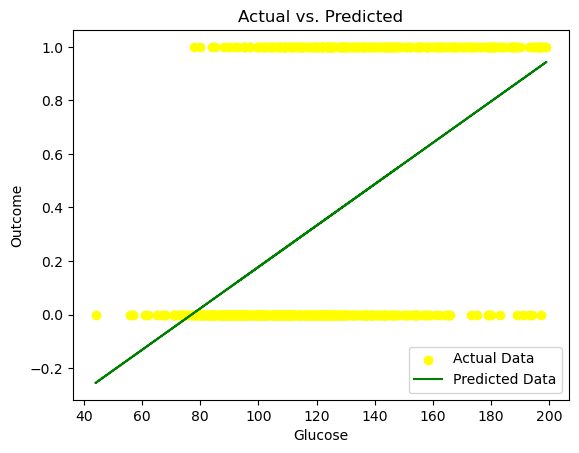

In [59]:
#creating regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

#Display coefficients (intercept and slope)
intercept = reg_model.intercept_
slope = reg_model.coef_[0]
print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

#Calculate RMSE (Root Mean Squared Error)
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

#Making predictions
y_pred_all = reg_model.predict(X)

# Add the predicted values to the DataFrame
df['Predicted_Outcome'] = y_pred_all

# Convert X and y arrays to DataFrames
X_df = pd.DataFrame(X, columns=['Glucose'])
y_df = pd.DataFrame(y, columns=['Outcome'])

# Concatenate X, y, and predicted values DataFrames
result_df = pd.concat([X_df, y_df, df['Predicted_Outcome']], axis=1)

# Save the concatenated DataFrame to a CSV file
result_df.to_csv('predicted_data_with_features.csv', index=False)

#Plot the graphs
plt.scatter(X, y, color='yellow', label='Actual Data')
plt.plot(X, y_pred_all, color='green', label='Predicted Data')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()